In [9]:
library(tidyverse)
library(MLmetrics)

In [10]:
pandas = read_tsv("~/RIDIR/Datasets/AreaInterpolateValidation/geopandas_intensive2010.tsv", col_names = c("TID", "pandas")) %>%
    arrange(desc(pandas))
head(pandas)
nrow(pandas)

Parsed with column specification:
cols(
  TID = col_character(),
  pandas = col_double()
)


TID,pandas
T42101000332,19.19754
T42101000365,16.92458
T42101000331,16.64821
T42101000315,16.09803
T42101003898,15.26946
T42101000221,15.17521


[1] 367

In [11]:
spark = read_tsv("~/RIDIR/Datasets/AreaInterpolateValidation/geospark_intensive2010.tsv", col_names = c("TID", "spark")) %>%
    arrange(desc(spark))
head(spark)
nrow(spark)

Parsed with column specification:
cols(
  TID = col_character(),
  spark = col_double()
)


TID,spark
T42101000332,19.19754
T42101000365,16.92458
T42101000331,16.64821
T42101000315,16.09803
T42101003898,15.26946
T42101000221,15.17521


[1] 367

In [12]:
table = pandas %>% left_join(spark, by = c("TID"))
head(table)
nrow(table)

TID,pandas,spark
T42101000332,19.19754,19.19754
T42101000365,16.92458,16.92458
T42101000331,16.64821,16.64821
T42101000315,16.09803,16.09803
T42101003898,15.26946,15.26946
T42101000221,15.17521,15.17521


[1] 367

In [13]:
head(table %>% filter(is.na(spark)))

TID,pandas,spark


In [14]:
table = spark %>% inner_join(pandas, by = c("TID")) %>% 
    mutate(diff = abs(pandas - spark)) %>%
    arrange(desc(diff))
head(table)
nrow(table)

TID,spark,pandas,diff
T42101000043,0.05525613,11.140997,11.085741
T42101000049,0.05018062,7.884856,7.834675
T42101000026,0.10523605,7.637017,7.531781
T42101000354,0.14679948,6.735455,6.588656
T42101000048,1.39957576,7.884856,6.485280
T42101000097,0.22309432,3.857030,3.633936


[1] 367

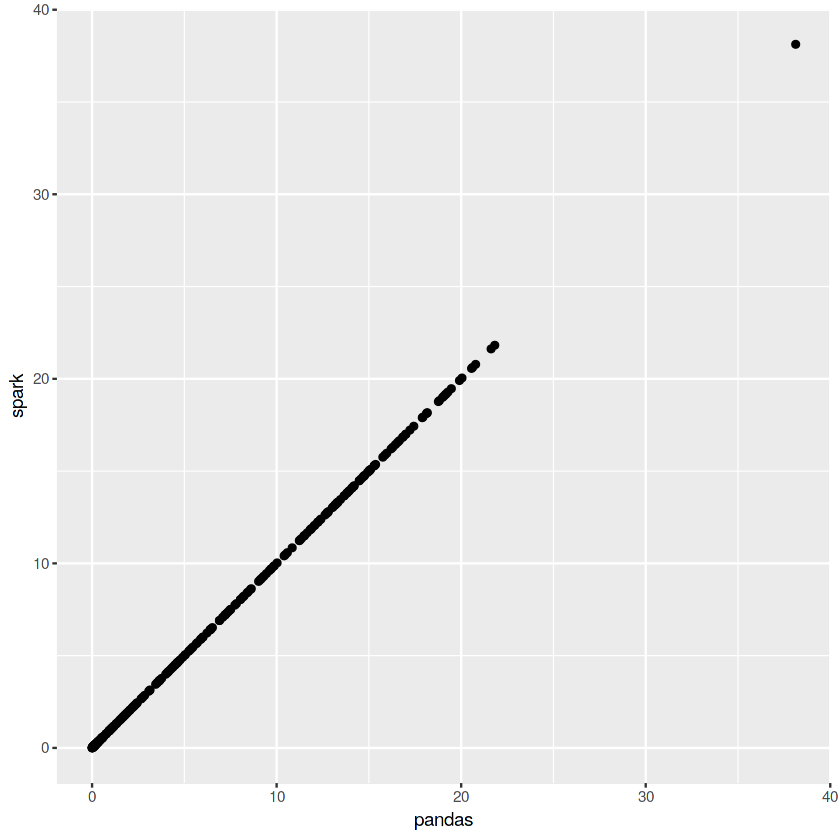

In [32]:
ggplot(data = table, aes(x = pandas, y = spark)) + geom_point()

In [33]:
print(paste("R2:   ", R2_Score(table$spark, table$pandas)))
print(paste("MAE:  ",      MAE(table$spark, table$pandas)))
print(paste("MSE:  ",      MSE(table$spark, table$pandas)))
print(paste("RMSE: ",     RMSE(table$spark, table$pandas)))
print(paste("RAE:  ",      RAE(table$spark, table$pandas)))


[1] "R2:    1"
[1] "MAE:   5.65396621446102e-16"
[1] "MSE:   1.78826492581888e-30"
[1] "RMSE:  1.33726023115132e-15"
[1] "RAE:   1.00231690589527e-16"
